<a href="https://colab.research.google.com/github/clavzno/STINTSY/blob/main/LaborForceSurveyAnalysis_Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook - Labor Force Survey 2016
*Made by STINTSY S17 | Group #5*

---

# Dataset Overview
- The **Labor Force Survey 2016** dataset was collected by the **Philippine Statistics Authority (PSA)**, it provides detailed information about employment, labor force participation, and job-related activities in the Philippines. The dataset includes attributes such as employment status, occupation, hours worked, job search activities, and demographic information such as age, sex, and education level.

### Data Collection Process
- *// To-do*

#### Implications of Data Collection
- *// To-do*

### Dataset Structure
- **Rows**: Each row represents an individual respondent in the survey.
- **Columns**: Each column represents a specific attribute or feature of the respondent, such as age, sex, employment status, hours worked, etc.
- **Number of Instances**: The dataset contains **180863 rows** (excluding the header row).
- **Number of Features**: The dataset contains **50 columns**.

### Features in the Dataset
Below is a description of all 50 features in the dataset:
**Demographic Variables**:
* `PUFREG`: Region (categorical)
* `PUFPRV`: Province code (categorical)
* `PUFPRRCD`: Province recode (categorical)
* `PUFHHSIZE`: Number of household members (numerical)
* `PUFC04_SEX`: Sex of the person (binary categorical)
* `PUFC05_AGE`: Age of the person (numerical)
* `PUFC06_MSTAT`: Marital status of the person (categorical)
* `PUFC07_GRADE`: Highest grade completed (numerical)

**Education Variables**:
* `PUFC08_CURSCH`: Currently attending school (binary categorical)
* `PUFC09_GRADTECH`: Graduate of a technical/vocational course (binary categorical)

**Employment Variables**:
* `PUFC11_WORK`: Worked in the past week (binary categorical)
* `PUFC12_JOB`: Had a job/business in the past week (binary categorical)
* `PUFC14_PROCC`: Primary occupation (categorical)
* `PUFC16_PKB`: Kind of business or industry (categorical)
* `PUFC17_NATEM`: Nature of employment (categorical)
* `PUFC18_PNWHRS`: Normal working hours per day (numerical)
* `PUFC19_PHOURS`: Total hours worked in the past week (numerical)
* `PUFC20_PWMORE`: Want more hours of work (binary categorical)
* `PUFC21_PLADDW`: Looked for additional work (binary categorical)
* `PUFC22_PFWRK`: First time doing any work (binary categorical)
* `PUFC23_PCLASS`: Class of worker for primary occupation (categorical)
* `PUFC24_PBASIS`: Basis of payment for primary occupation (categorical)
* `PUFC25_PBASIC`: Basic pay per day (numerical)
* `PUFC26_OJOB`: Had another job/business (binary categorical)
* `PUFC27_NJOBS`: Number of jobs in the past week (numerical)
* `PUFC28_THOURS`: Total hours worked for all jobs (numerical)
* `PUFNEWEMPSTAT`: New Employment Criteria (categorical)

**Job Search Variables**:
* `PUFC30_LOOKW`: Looked for work or tried to establish a business (binary categorical)
* `PUFC31_FLWRK`: First time looking for work (binary categorical)
* `PUFC32_JOBSM`: Job search method (categorical)
* `PUFC33_WEEKS`: Weeks spent looking for work (numerical)
* `UFC34_WYNOT`: Reason for not looking for work (categorical)
* `PUFC35_LTLOOKW`: Last time looked for work (numerical)
* `PUFC36_AVAIL`: Available for work (binary categorical)
* `PUFC37_WILLING`: Willing to take up work (binary categorical)
* `PUFC38_PREVJOB`: Worked at any time before (binary categorical)
* `PUFC40_POCC`: Last occupation (categorical)
* `PUFC41_WQTR`: Worked or had a job during the past quarter (binary categorical)
* `PUFC43_QKB`: Kind of business for the past quarter (categorical)

**Date Variables**:
* `PUFSVYMO`: Survey month (numerical)
* `PUFSVYYR`: Survey year (numerical)
* `PUFPSU`: PSU number (numerical)
* `PUFRPL`: Replicate (numerical)
* `PUFPWGTFIN`: Final weight based on projection (numerical)

Source: https://psada.psa.gov.ph/catalog/67/data-dictionary/F1?file_name=lfs_april2016

---

**The date variables will not be used, as the data is all collected on the same month and year on april 2016, making those variables obsolete. Similarly with the PSU number and the Replicate**

In [3]:
import pandas as pd
file_path = "https://raw.githubusercontent.com/clavzno/STINTSY/refs/heads/main/data/LFS%20PUF%20April%202016.CSV?token=GHSAT0AAAAAAC5BCOLN7OEPRILIFT6TJALWZ7BPJIA"
df = pd.read_csv(file_path)
print(df.head())

   PUFREG  PUFPRV  PUFPRRCD  PUFHHNUM  PUFURB2K10  PUFPWGTFIN  PUFSVYMO  \
0       1      28      2800         1           2    405.2219         4   
1       1      28      2800         1           2    388.8280         4   
2       1      28      2800         1           2    406.1194         4   
3       1      28      2800         2           2    405.2219         4   
4       1      28      2800         2           2    384.3556         4   

   PUFSVYYR  PUFPSU  PUFRPL  ...  PUFC33_WEEKS  PUFC34_WYNOT  PUFC35_LTLOOKW  \
0      2016     217       1  ...                                               
1      2016     217       1  ...                                               
2      2016     217       1  ...                                               
3      2016     217       1  ...                                               
4      2016     217       1  ...                                               

   PUFC36_AVAIL  PUFC37_WILLING PUFC38_PREVJOB PUFC40_POCC PUFC41_WQ

# Section 2: **Data Cleaning**

We can first separate our variables onto different categories depending on which type of data they can be classified as:

**Numerical**
* `PUFC05_AGE`: Age of the person
* `PUFC18_PNWHRS`: Normal working hours per day
* `PUFC19_PHOURS`: Total hours worked in the past week
* `PUFC25_PBASIC`: Basic pay per day

**Categorical**
* `PUFREG`: Region
* `PUFC16_PKB`: Kind of business or industry
* `PUFC17_NATEM`: Nature of employment
* `PUFC14_PROCC`: Primary occupation
* `PUFC04_SEX`: Sex of the person

**Binary Categorical**
* `PUFC08_CURSCH`: Currently attending school
* `PUFC26_OJOB`: Had another job/business

First, we check for duplicate data or NaN values in the original dataframe before grouping the selected variables together.

In [ ]:
duplicate_count =lfs_df.duplicated().sum()
duplicate_count

0

In [ ]:
null_count = lfs_df.isnull().sum()
null_count

,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


In [ ]:
selected_vars = ['PUFREG', 'PUFC04_SEX', 'PUFC05_AGE', 'PUFC16_PKB', 'PUFC17_NATEM', 'PUFC08_CURSCH', 'PUFC18_PNWHRS',
                 'PUFC19_PHOURS', 'PUFC14_PROCC', 'PUFC26_OJOB', 'PUFC25_PBASIC']
jobs_df = lfs_df[selected_vars].copy()
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   PUFREG         180862 non-null  int64 
 1   PUFC04_SEX     180862 non-null  int64 
 2   PUFC05_AGE     180862 non-null  int64 
 3   PUFC16_PKB     180862 non-null  object
 4   PUFC17_NATEM   180862 non-null  object
 5   PUFC08_CURSCH  180862 non-null  object
 6   PUFC18_PNWHRS  180862 non-null  object
 7   PUFC19_PHOURS  180862 non-null  object
 8   PUFC14_PROCC   180862 non-null  object
 9   PUFC26_OJOB    180862 non-null  object
 10  PUFC25_PBASIC  180862 non-null  object
dtypes: int64(3), object(8)
memory usage: 15.2+ MB


In [ ]:
numericalvar_df = jobs_df[['PUFC05_AGE', 'PUFC18_PNWHRS', 'PUFC19_PHOURS', 'PUFC25_PBASIC']]
categoricalvar_df = jobs_df[['PUFREG', 'PUFC16_PKB', 'PUFC14_PROCC', 'PUFC17_NATEM', 'PUFC04_SEX']]
binaryvar_df = jobs_df[['PUFC08_CURSCH', 'PUFC26_OJOB']]

In [ ]:
jobs_df.head(20)

,PUFREG,PUFC04_SEX,PUFC05_AGE,PUFC16_PKB,PUFC17_NATEM,PUFC08_CURSCH,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC14_PROCC,PUFC26_OJOB,PUFC25_PBASIC
0,1,1,49,01,1,,08,024,61,1,
1,1,2,61,01,2,,04,008,92,2,
2,1,1,19,01,2,2,08,024,92,1,00250
3,1,1,48,01,1,,04,020,61,1,
4,1,2,41,96,1,,12,072,91,2,00115
5,1,1,20,47,2,2,08,048,52,2,00200
6,1,2,15,,,1,,,,,
7,1,1,59,01,1,,04,020,61,1,
8,1,2,61,84,1,,08,010,53,2,
9,1,2,11,,,1,,,,,


There still seems to be blank values, though, after consulting the valueset, they are the corresponding value to "not-applicable" answers, which we will change to be more readable in the preprocessing phase.

## Binary Categorical Variable Preprocessing

We can start our data cleaning process with binary categorical variables.

In [ ]:
binaryvar_df.head(20)

,PUFC08_CURSCH,PUFC26_OJOB
0,,1
1,,2
2,2,1
3,,1
4,,2
5,2,2
6,1,
7,,1
8,,2
9,1,


As we can see, there are some rows with blank responses, and according to the valueset, this is interpreted as "not applicable".

In [ ]:
jobs_df[['PUFC08_CURSCH', 'PUFC26_OJOB']]

,PUFC08_CURSCH,PUFC26_OJOB
0,,1
1,,2
2,2,1
3,,1
4,,2
...,...,...
180857,,2
180858,,
180859,,
180860,,


Given that these variables have binary responses, it would be more appropriate to change them into boolean datatypes for a more appropriate data representation.

To transform them into a boolean datatype, we have to first see the value counts of each specific variable in order to limit the responses into either 1 or 0.

In [ ]:
jobs_df['PUFC08_CURSCH'].value_counts()

,count
PUFC08_CURSCH,
,107137
1,51643
2,22082


In [ ]:
jobs_df['PUFC26_OJOB'].value_counts()

,count
PUFC26_OJOB,
,109507
2,65417
1,5938


### Attending School variable & Secondary Job variable

Given these responses and cross referencing these responses with the valueset provided along with the dataset, we are able to first understand what each of these responses mean.

* `PUC08_CURSCH` responses represent whether the respondent is currently attending school or not.
* `PUFC26_OJOB`  responses represents whether the respondent currently has another job aside from their primary occupation.

Valuset dictates that:
* 1 = Yes
* 2 = No
* blank = Not Applicable

Given these representations, we are then able to convert and combine them into 2 distinct responses by combining No(2), and Not Applicable(blank) into False(0), and leaving Yes as True(1).

We first do this by combining the responses first, then changing the datatype later.

In [ ]:
jobs_df['PUFC08_CURSCH'] = jobs_df['PUFC08_CURSCH'].replace({'2': 0, ' ': 0})
jobs_df['PUFC26_OJOB'] = jobs_df['PUFC26_OJOB'].replace({'2': 0, ' ': 0})

In [ ]:
jobs_df['PUFC08_CURSCH'].value_counts()

,count
PUFC08_CURSCH,
0,129219
1,51643


In [ ]:
jobs_df['PUFC26_OJOB'].value_counts()

,count
PUFC26_OJOB,
0,174924
1,5938


In [ ]:
jobs_df['PUFC08_CURSCH'] = jobs_df['PUFC08_CURSCH'].astype(bool)
jobs_df['PUFC26_OJOB'] = jobs_df['PUFC26_OJOB'].astype(bool)

In [ ]:
jobs_df['PUFC08_CURSCH'].value_counts()

,count
PUFC08_CURSCH,
False,129219
True,51643


In [ ]:
jobs_df['PUFC26_OJOB'].value_counts()

,count
PUFC26_OJOB,
False,174924
True,5938


In [ ]:
jobs_df[['PUFC08_CURSCH', 'PUFC26_OJOB']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   PUFC08_CURSCH  180862 non-null  bool 
 1   PUFC26_OJOB    180862 non-null  bool 
dtypes: bool(2)
memory usage: 353.4 KB


## Categorical Variable Preprocessing

Now that we've converted the binary category variables into their respective datatypes and responses, we move on to the other categorical variables.

In [ ]:
categoricalvar_df.head(20)

,PUFREG,PUFC16_PKB,PUFC14_PROCC,PUFC17_NATEM,PUFC04_SEX
0,1,01,61,1,1
1,1,01,92,2,2
2,1,01,92,2,1
3,1,01,61,1,1
4,1,96,91,1,2
5,1,47,52,2,1
6,1,,,,2
7,1,01,61,1,1
8,1,84,53,1,2
9,1,,,,2


### Sex variable

Starting off with `PUFC04_SEX` which is the sex of the respondent, according to the valueset,
* 1 = Male
* 2 = Female

Therefore we may opt to change the numbers into characters M and F for easier readability.

In [ ]:
jobs_df[['PUFREG', 'PUFC16_PKB', 'PUFC14_PROCC', 'PUFC17_NATEM', 'PUFC04_SEX']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   PUFREG        180862 non-null  int64 
 1   PUFC16_PKB    180862 non-null  object
 2   PUFC14_PROCC  180862 non-null  object
 3   PUFC17_NATEM  180862 non-null  object
 4   PUFC04_SEX    180862 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 6.9+ MB


In [ ]:
jobs_df['PUFC04_SEX'].value_counts()

,count
PUFC04_SEX,
1,91539
2,89323


We change the datatype to the 'category' from object first.

In [ ]:
jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].astype('category')

In [ ]:
jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].replace({2: 'F', 1: 'M'})
jobs_df['PUFC04_SEX'].value_counts()

<ipython-input-26-384c6a1416f6>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].replace({2: 'F', 1: 'M'})


,count
PUFC04_SEX,
M,91539
F,89323


### Nature of Employment variable

Moving on to the variable `PUFC17_NATEM`, which represents the nature of employment of each respondent,
* 1 = Permanent Job
* 2 = Short-term
* 3 = Different employer
* blank = Not applicable/no employment

Since our aim will be to focus on the respondents who are employed, we drop all respondents who are not employed.

In [ ]:
(jobs_df['PUFC17_NATEM'] != ' ').sum()

71355

This will narrow down our dataframe to 71355 respondents.

In [ ]:
jobs_df = jobs_df[jobs_df['PUFC17_NATEM'] != ' ']
jobs_df.head(20)

,PUFREG,PUFC04_SEX,PUFC05_AGE,PUFC16_PKB,PUFC17_NATEM,PUFC08_CURSCH,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC14_PROCC,PUFC26_OJOB,PUFC25_PBASIC
0,1,M,49,01,1,False,08,024,61,True,
1,1,F,61,01,2,False,04,008,92,False,
2,1,M,19,01,2,False,08,024,92,True,00250
3,1,M,48,01,1,False,04,020,61,True,
4,1,F,41,96,1,False,12,072,91,False,00115
5,1,M,20,47,2,False,08,048,52,False,00200
7,1,M,59,01,1,False,04,020,61,True,
8,1,F,61,84,1,False,08,010,53,False,
11,1,M,51,49,1,False,04,020,13,False,
14,1,M,23,80,2,False,12,060,54,False,00335


### Primary Occupation variable

`PUFC14_PROCC` represents the primary occupation of the respondents.

According to the valueset, the responses are grouped into different bins:
* 11-14 = managers
* 21-26 = professionals
* 31-36 = technicians and associate professionals
* 41-44 = clerical support workers
* 51-54 = service and sales workers
* 61-63 = skilled agricultural, forestry and fishery workers
* 71-75 = craft and related trades workers
* 81-83 = plant and machine operators and assemblers
* 91-96 = elementary occupations
* 1-3 = armed forces occupations

In [ ]:
jobs_df['PUFC14_PROCC'].value_counts()

,count
PUFC14_PROCC,
92,9565
61,8499
14,6820
52,5546
93,5239
13,3968
91,3026
83,2823
51,2778


We can group the different responses into categorical bins and represent their numbers as the title of their occupation.

In [ ]:
PUFC14_PROCC_bins = [0, 3, 14, 26, 36, 44, 54, 63, 75, 83, 97]
PUFC14_PROCC_labels = [
    'Armed Forces Occupations',
    'Managers',
    'Professionals',
    'Technicians and Associate Professionals',
    'Clerical Support Workers',
    'Service and Sales Workers',
    'Skilled Agricultural, Forestry and Fishery Workers',
    'Craft and Related Trades Workers',
    'Plant and Machine Operators and Assemblers',
    'Elementary Occupations',
]

To start the binning process, we first have to convert the variable to an integer as it is currently an object.

In [ ]:
jobs_df['PUFC14_PROCC'] = jobs_df['PUFC14_PROCC'].astype('int')

Now we start the binning process that the datatype has been modified.

In [ ]:
jobs_df['PUFC14_PROCC'] = pd.cut(jobs_df['PUFC14_PROCC'], bins=PUFC14_PROCC_bins, labels=PUFC14_PROCC_labels, right=False)

jobs_df['PUFC14_PROCC'].value_counts()

,count
PUFC14_PROCC,
Elementary Occupations,21871
"Skilled Agricultural, Forestry and Fishery Workers",11991
Professionals,10199
Service and Sales Workers,9553
Managers,5325
Craft and Related Trades Workers,4312
Clerical Support Workers,3095
Technicians and Associate Professionals,2773
Plant and Machine Operators and Assemblers,2163


In [ ]:
jobs_df['PUFC14_PROCC'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC14_PROCC
Non-Null Count  Dtype   
--------------  -----   
71355 non-null  category
dtypes: category(1)
memory usage: 627.5 KB


The datatype automatically gets converted into 'category' datatype, so no need to convert the datatype.

### Kind of Industry variable

The `PUFC16_PKB` variable dictates the major industry that the respondent works in.

The `PUFC16_PKB` variable has 2 sets of bins, the first one encompassing the general industrty that the respondent works in:
* 1-3 = Agricultural
* 5-43 = Industrial
* 45-99 = Services

The other set of bins being the more specific industry that the respondent works in:
* 1-2 = Agriculture and Forestry
* 3 = Fishing
* 5-9 = Mining and Quarying
* 10-33 = Manufacturing
* 35 = Electricity, Gas, Steam and Airconditioning Supply
* 36-39 = Water Supply; Sewage, Waste Management and Remediation Activities
* 41-43 = Construction
* 45-47 = Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles
* 49-53 = Transportation and Storage
* 55-56 = Accommodation and Food Service Activities
* 58-63 = Information and Communication
* 64-66 = Financial and Insurance Activities
* 68 = Real Estate Activities
* 69-75 = Professional, Scientific and Technical Activities
* 77-82 = Administrative and Support Service Activities
* 84 = Public Administration and Defense; Compulsory Social Security
* 85 = Education
* 86-88 = Human Health and Social Work Activities
* 90-93 = Arts, Entertainment and Recreation
* 94-96 = Other Service Activities
* 97-98 = Activities of Households as Employers
* 99 = Activities of Extraterritorial Organizations and Bodies

Given these bins, we can make a separate column that shows the general industry that the respondent works in, while keeping PUFC16_PKB to show their specific industry.

In [ ]:
PUFC16_PKB_GENERAL_bins = [0, 3, 43, 99]
PUFC16_PKB_GENERAL_labels = [
    'Agricultural',
    'Industrial',
    'Services']

PUFC16_PKB_bins = [0, 2, 3, 9, 33, 35, 39, 43, 47, 53, 56, 63, 66, 68, 75, 82, 84, 85, 88, 93, 96, 98, 99]
PUFC16_PKB_labels = [
    'Agriculture and Forestry',
    'Fishing',
    'Mining and Quarying',
    'Manufacturing',
    'Electricity, Gas, Steam and Airconditioning Supply',
    'Water Supply; Sewage, Waste Management and Remediation Activities',
    'Construction',
    'Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
    'Transportation and Storage',
    'Accommodation and Food Service Activities',
    'Information and Communication',
    'Financial and Insurance Activities',
    'Real Estate Activities',
    'Professional, Scientific and Technical Activities',
    'Administrative and Support Service Activities',
    'Public Administration and Defense; Compulsory Social Security',
    'Education',
    'Human Health and Social Work Activities',
    'Arts, Entertainment and Recreation',
    'Other Service Activities',
    'Activities of Households as Employers',
    'Activities of Extraterritorial Organizations and Bodies'
]

We have to first convert the datatype into the integer datatype in order to bin the responses properly.

In [ ]:
jobs_df['PUFC16_PKB'] = jobs_df['PUFC16_PKB'].astype('int')

Now we start the binning process that the datatype has been modified.

In [ ]:
jobs_df['PUFC16_PKB_GENERAL'] = pd.cut(jobs_df['PUFC16_PKB'], bins=PUFC16_PKB_GENERAL_bins, labels=PUFC16_PKB_GENERAL_labels, right=False)
jobs_df['PUFC16_PKB_GENERAL'].value_counts()

,count
PUFC16_PKB_GENERAL,
Services,39618
Agricultural,17853
Industrial,13874


In [ ]:
jobs_df['PUFC16_PKB'] = pd.cut(jobs_df['PUFC16_PKB'], bins=PUFC16_PKB_bins, labels=PUFC16_PKB_labels, right=False)
jobs_df['PUFC16_PKB'].value_counts()

,count
PUFC16_PKB,
Agriculture and Forestry,17411
Transportation and Storage,17014
Construction,5282
Manufacturing,4955
Education,4300
Activities of Households as Employers,4235
Mining and Quarying,3269
Human Health and Social Work Activities,3117
Information and Communication,2961


In [ ]:
jobs_df[['PUFC16_PKB_GENERAL', 'PUFC16_PKB']].head(20)

,PUFC16_PKB_GENERAL,PUFC16_PKB
0,Agricultural,Agriculture and Forestry
1,Agricultural,Agriculture and Forestry
2,Agricultural,Agriculture and Forestry
3,Agricultural,Agriculture and Forestry
4,Services,Activities of Households as Employers
5,Services,Transportation and Storage
7,Agricultural,Agriculture and Forestry
8,Services,Education
11,Services,Transportation and Storage
14,Services,Administrative and Support Service Activities


### Region variable

The last categorical variable, `PUFREG`, which represents the region where the respondent originates from.

The valueset goes as follows:
* 13 = National Capital Region
* 14 = Cordillera Administrative Region
* 1 = Region I - Ilocos Region
* 2 = Region II - Cagayan Valley
* 3 = Region III - Central Luzon
* 4 = Region IVA - CALABARZON
* 17 = Region IVB - MIMAROPA
* 5 = Region V - Bicol
* 6 = Region VI - Western Visayas
* 7 = Region VII - Central Visayas
* 8 = Region VIII - Eastern Visayas
* 9 = Region IX - Zamboanga Peninsula
* 10 = Region X - Northern Mindanao
* 11 = Region XI - Davao
* 12 = Region XII - SOCCSKSARGEN
* 16 = Region XIII - Caraga
* 15 = Autonomous Region in Muslim Mindanao

We can represent these regions better by displaying their name instead of their corresponding number. We can process this easier by using mapping.

In [ ]:
jobs_df['PUFREG'].value_counts()

,count
PUFREG,
13,10417
3,5451
6,4815
8,4796
7,4512
10,4487
14,4424
5,3928
16,3682


In [ ]:
PUFREG_mapping = {
    13: 'National Capital Region',
    14: 'Cordillera Administrative Region',
    1: 'Region I - Ilocos Region',
    2: 'Region II - Cagayan Valley',
    3: 'Region III - Central Luzon',
    4: 'Region IVA - CALABARZON',
    17: 'Region IVB - MIMAROPA',
    5: 'Region V - Bicol',
    6: 'Region VI - Western Visayas',
    7: 'Region VII - Central Visayas',
    8: 'Region VIII - Eastern Visayas',
    9: 'Region IX - Zamboanga Peninsula',
    10: 'Region X - Northern Mindanao',
    11: 'Region XI - Davao',
    12: 'Region XII - SOCCSKSARGEN',
    16: 'Region XIII - Caraga',
    15: 'Autonomous Region in Muslim Mindanao'
}

In [ ]:
jobs_df['PUFREG'] = jobs_df['PUFREG'].map(PUFREG_mapping)
jobs_df['PUFREG'].value_counts()

,count
PUFREG,
National Capital Region,10417
Region III - Central Luzon,5451
Region VI - Western Visayas,4815
Region VIII - Eastern Visayas,4796
Region VII - Central Visayas,4512
Region X - Northern Mindanao,4487
Cordillera Administrative Region,4424
Region V - Bicol,3928
Region XIII - Caraga,3682


In [ ]:
jobs_df['PUFREG'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFREG
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


As we can see, the datatype is still left as 'object', we want to convert that to a category to be more appropriate.

In [ ]:
jobs_df['PUFREG'] = jobs_df['PUFREG'].astype('category')
jobs_df['PUFREG'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFREG
Non-Null Count  Dtype   
--------------  -----   
71355 non-null  category
dtypes: category(1)
memory usage: 627.8 KB


## Numerical Variable Preprocessing

After finishing the required preprocessing for all categorical variables, we move on to the preprocessing for numerical variables.

In [ ]:
numericalvar_df.head(20)

,PUFC05_AGE,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC25_PBASIC
0,49,08,024,
1,61,04,008,
2,19,08,024,00250
3,48,04,020,
4,41,12,072,00115
5,20,08,048,00200
6,15,,,
7,59,04,020,
8,61,08,010,
9,11,,,


### Basic Pay variable

In [ ]:
jobs_df['PUFC25_PBASIC'].unique()

array(['     ', '00250', '00115', ..., '00728', '01573', '00922'],
      dtype=object)

In [ ]:
# Turning the white space value into NaN
jobs_df['PUFC25_PBASIC'] = jobs_df['PUFC25_PBASIC'].replace(r'^\s*$', np.nan, regex=True)

jobs_df['PUFC25_PBASIC'].isnull().sum()

34767

In order to deal with the `NaN` values, we will set the value to 0 and convert the data type into integer to make it easier to work with later on.

We will also convert the data type to `int` to make it easier to work with.

In [ ]:
# Setting the null value to 0
jobs_df['PUFC25_PBASIC'].fillna(0, inplace=True)

# Setting the dtype to int
jobs_df['PUFC25_PBASIC'] = jobs_df['PUFC25_PBASIC'].astype(int)

jobs_df['PUFC25_PBASIC'].unique()

<ipython-input-47-38c11c89372c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jobs_df['PUFC25_PBASIC'].fillna(0, inplace=True)


array([   0,  250,  115, ...,  728, 1573,  922])

Since `0` represent data that we want to disregard, we will tackle the rest of Basic Pay per Day without the `0` values.

We will also visualize our data so we can see the distribution of our data.

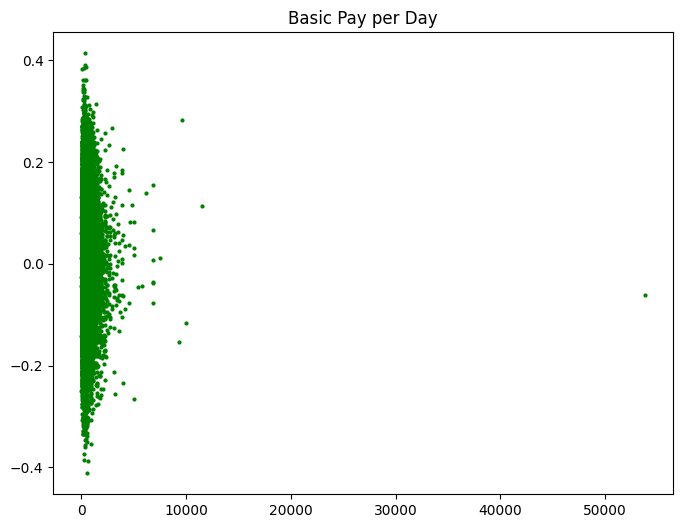

In [ ]:
jobs_df = jobs_df[jobs_df['PUFC25_PBASIC'] != 0]

plt.figure(figsize=(8, 6))
jitter = np.random.normal(0, 0.1, size=len(jobs_df['PUFC25_PBASIC']))
plt.plot(jobs_df['PUFC25_PBASIC'], jitter, 'go', markersize=2)
plt.title('Basic Pay per Day')
plt.show()

Since our data is skewed, we will apply log transformation in order to normalize our data.

In [ ]:
jobs_df['PUFC25_PBASIC'] = np.log(jobs_df['PUFC25_PBASIC'])

jobs_df['PUFC25_PBASIC']

,PUFC25_PBASIC
2,5.521461
4,4.744932
5,5.298317
14,5.814131
15,5.857933
...,...
180837,5.659482
180844,5.438079
180845,6.805723
180847,5.768321


We will visualize the data again to check for outliers.

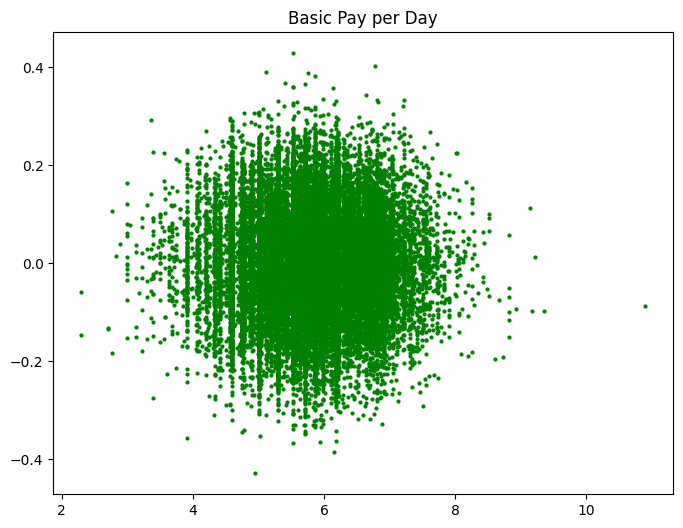

In [ ]:
plt.figure(figsize=(8, 6))
jitter = np.random.normal(0, 0.1, size=len(jobs_df['PUFC25_PBASIC']))
plt.plot(jobs_df['PUFC25_PBASIC'], jitter, 'go', markersize=2)
plt.title('Basic Pay per Day')
plt.show()

Since we still have some outliers, we can use the interquartile range and adjust its threshold.

In [ ]:
# Computing for the IQR

lbp_q1 = jobs_df['PUFC25_PBASIC'].quantile(0.25)
lbp_q3 = jobs_df['PUFC25_PBASIC'].quantile(0.75)
lbp_iqr = lbp_q3 - lbp_q1

# Computing for the adjusted IQR thresholds

lbp_lw = lbp_q1 - 2 * lbp_iqr
lbp_uw = lbp_q3 + 2 * lbp_iqr

# Removing the outliers from the DF
jobs_df = jobs_df[(jobs_df['PUFC25_PBASIC'] >= lbp_lw) & (jobs_df['PUFC25_PBASIC'] <= lbp_uw)]

outlier_count_after = jobs_df[(jobs_df['PUFC25_PBASIC'] < lbp_lw) | (jobs_df['PUFC25_PBASIC'] > lbp_uw)].shape[0]
print("Number of outliers:", outlier_count_after)

Number of outliers: 0


### Age variable

`PUFC05_AGE` represents the age of the respondent as of their last birthday.

We first need to assess what range we are dealing with for the age.

In [ ]:
jobs_df['PUFC05_AGE'].unique()

array([19, 41, 20, 23, 71, 54, 27, 46, 38, 35, 51, 22, 44, 40, 26, 45, 52,
       55, 30, 62, 33, 29, 24, 21, 34, 25, 37, 43, 17, 60, 28, 42, 50, 58,
       57, 36, 18, 70, 48, 47, 61, 31, 32, 49, 39, 68, 53, 16, 56, 65, 63,
       59, 69, 87, 64, 75, 76, 15, 66, 67, 72, 85, 74, 83, 73, 77, 79, 78,
       80, 91, 81, 99, 82])

We can see that some of the unique variables go above your typical working age so we need to check if there are outliers within our data.

In [ ]:
jobs_df['PUFC05_AGE'] = jobs_df['PUFC05_AGE'].astype(float)

<ipython-input-53-449df5409fc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_df['PUFC05_AGE'] = jobs_df['PUFC05_AGE'].astype(float)


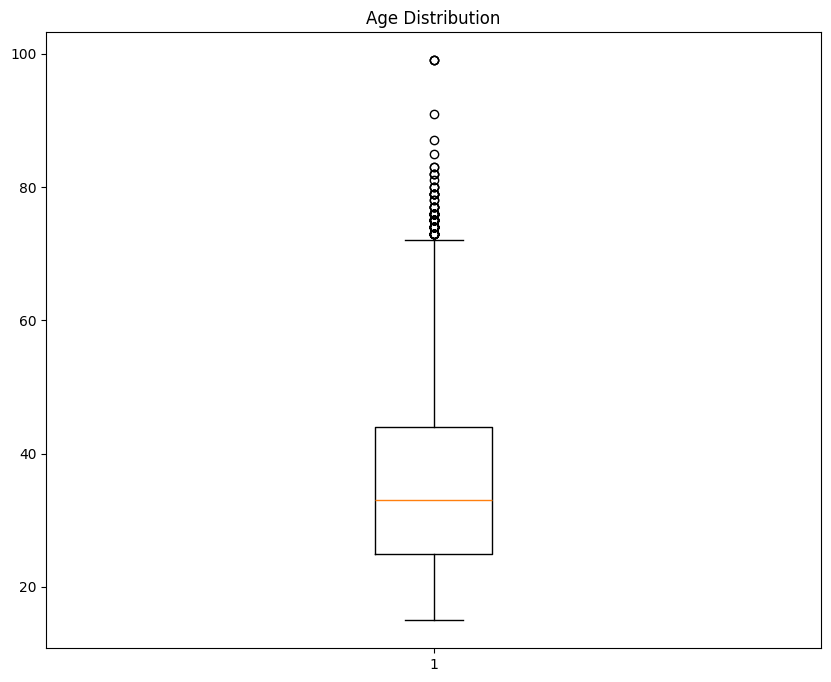

In [ ]:
# Initial Boxplot for the Age Distribution

plt.figure(figsize=(10, 8))
plt.boxplot(x=jobs_df['PUFC05_AGE'])
plt.title('Age Distribution')
plt.show()

Using the boxplot, we can easily spot the outliers in our data represented by the circles.

Since the outliers seem to be fairly manageable, we can do mean imputation to normalize the data.

In [ ]:
# Computing for the IQR

age_q1 = jobs_df['PUFC05_AGE'].quantile(0.25)
age_q3 = jobs_df['PUFC05_AGE'].quantile(0.75)
age_iqr = age_q3 - age_q1

# Getting the outliers

age_lw = age_q1 - 2 * age_iqr
age_uw = age_q3 + 2 * age_iqr
age_outliers = jobs_df[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw)]
age_outliers['PUFC05_AGE'].shape[0]

8

Let's get the mean of the ages without the outliers

In [ ]:
mean_val = jobs_df[(jobs_df['PUFC05_AGE'] >= age_lw) & (jobs_df['PUFC05_AGE'] <= age_uw)]['PUFC05_AGE'].mean()
mean_val

35.33282069590531

After getting the mean, we will use it to set the values of the outliers for the mean imputation.

In [ ]:
jobs_df.loc[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw), 'PUFC05_AGE'] = mean_val
outlier_count_after = jobs_df[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw)].shape[0]
print("Number of outliers after imputation:", outlier_count_after)

Number of outliers after imputation: 0


### Work Hours per Day variable

`PUFC18_PNWHRS` represent the different normal working hours per day ranging from 1 to 16.

In [ ]:
jobs_df['PUFC18_PNWHRS'].unique()

array(['08', '12', '04', '10', '09', '06', '03', '05', '07', '01', '02',
       '15', '11', '14', '16', '13'], dtype=object)

We can convert this data into an integer type in order to easily work with the data later on.

In [ ]:
jobs_df['PUFC18_PNWHRS'] = jobs_df['PUFC18_PNWHRS'].astype(int)
jobs_df['PUFC18_PNWHRS'].unique()

array([ 8, 12,  4, 10,  9,  6,  3,  5,  7,  1,  2, 15, 11, 14, 16, 13])

### Total Work Hours variable

`PUFC19_PHOURS` represent the total work hours in the past week, including the primary and secondary occupation (if any).

The value set includes numbers ranging from 0 to 112, for the work hours wherein 0 represents the non-workers in the survey and 999 for not reported.

In [ ]:
jobs_df['PUFC19_PHOURS'].unique()

array(['024', '072', '048', '060', '016', '040', '070', '045', '032',
       '054', '042', '006', '028', '008', '030', '056', '036', '020',
       '015', '009', '021', '084', '000', '050', '018', '012', '014',
       '004', '035', '044', '090', '077', '049', '025', '052', '064',
       '059', '057', '010', '027', '063', '066', '003', '112', '096',
       '078', '091', '098', '022', '055', '007', '002', '058', '005',
       '075', '033', '105', '062', '031', '011', '034', '026', '094',
       '065', '001', '039', '041', '092', '046', '038', '051', '080',
       '074', '068', '061', '019', '088', '069', '073', '082', '013',
       '081', '053', '043', '047', '067', '037', '108'], dtype=object)

The data does not include 0 and 999 anymore as we have been able to filter the data previously to only accommodate the working respondents.

However, similar to our previous variable, we can also convert the data type into integer so it will be easier to work with it later on.

In [ ]:
jobs_df['PUFC19_PHOURS'] = jobs_df['PUFC19_PHOURS'].astype(int)
jobs_df['PUFC19_PHOURS'].unique()

array([ 24,  72,  48,  60,  16,  40,  70,  45,  32,  54,  42,   6,  28,
         8,  30,  56,  36,  20,  15,   9,  21,  84,   0,  50,  18,  12,
        14,   4,  35,  44,  90,  77,  49,  25,  52,  64,  59,  57,  10,
        27,  63,  66,   3, 112,  96,  78,  91,  98,  22,  55,   7,   2,
        58,   5,  75,  33, 105,  62,  31,  11,  34,  26,  94,  65,   1,
        39,  41,  92,  46,  38,  51,  80,  74,  68,  61,  19,  88,  69,
        73,  82,  13,  81,  53,  43,  47,  67,  37, 108])